#**Linear Regession**

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data=pd.read_csv('/content/car_age_price.csv')

In [23]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [24]:
data.shape

(112, 2)

In [25]:
data['Year'].nunique()

8

In [26]:
data['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [28]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


<Axes: >

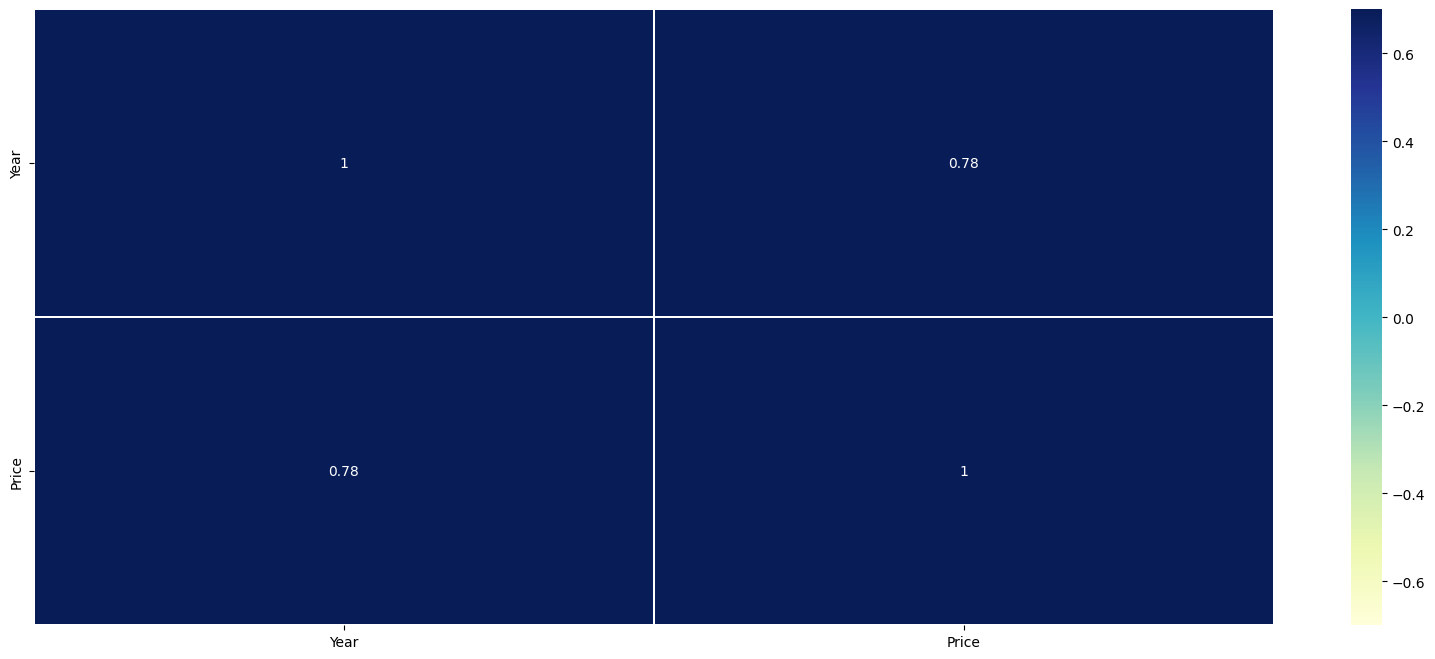

In [29]:
corrmatrix = data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.7,annot=True,linewidth=0.2,cmap='YlGnBu')

In [30]:
x= data.drop('Price',axis=1)
y= data['Price']

In [31]:
#split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [32]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [33]:
#train
model = lr.fit(x_train,y_train)

In [34]:
#do predictions
predictions = model.predict(x_test)

In [35]:
predictions

array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
       552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
       599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
       411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
       317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
       505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886])

In [36]:
y_test

,Price
40,525000
65,495000
4,465000
47,450000
42,550000
69,300000
26,550000
11,500000
10,500000
44,550000


In [37]:
from sklearn.metrics import mean_squared_error
print('MSE is \n',mean_squared_error(y_test,predictions))

MSE is 
 3878767151.073449


In [38]:
from sklearn.metrics import r2_score
print('R squared value is \n',r2_score(y_test,predictions))

R squared value is 
 0.4347961632108023


In [40]:
#given input
p=model.predict([[2022]])
print("price:",p)


price: [740160.11937766]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


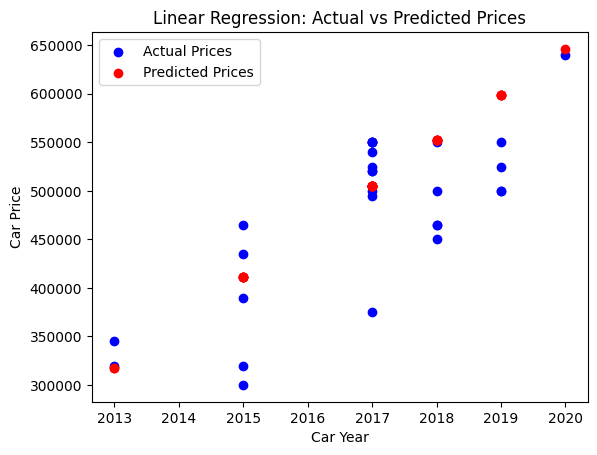

In [72]:
plt.scatter(x_test, y_test, color='blue', label='Actual Prices')
plt.scatter(x_test, predictions, color='red', label='Predicted Prices')
plt.xlabel('Car Year')
plt.ylabel('Car Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

#**Lasso Regression**

In [65]:
from sklearn.linear_model import Lasso
data1=pd.read_csv('/content/car_age_price.csv')

X = data1.drop('Price',axis=1) # Feature
Y = data1['Price']   # Target variable



In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [67]:
lasso = Lasso(alpha=0.1)  # alpha parameter
lasso.fit(X_train,Y_train)

Lasso(alpha=0.1)

In [68]:
y_pred = lasso.predict(X_test)

In [69]:
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4326901608.19506


In [70]:
from sklearn.metrics import r2_score
print('R squared value is \n',r2_score(Y_test,y_pred))

R squared value is 
 0.36759381368868127


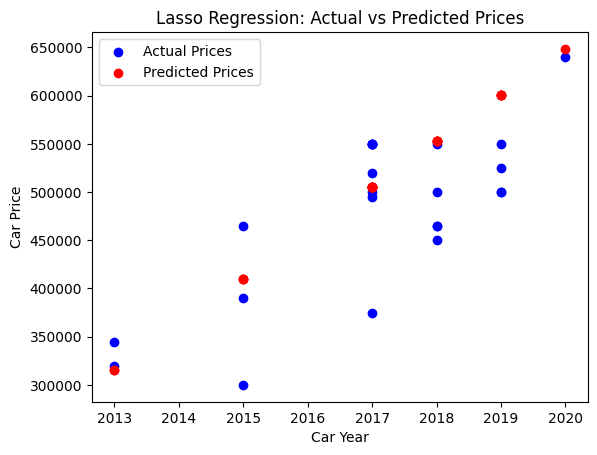

In [71]:
plt.scatter(X_test, Y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
plt.xlabel('Car Year')
plt.ylabel('Car Price')
plt.title('Lasso Regression: Actual vs Predicted Prices')
plt.legend()
plt.show()

In [73]:
#given input
p1=lasso.predict([[2022]])
print("price:",p1)


price: [743601.39177768]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [75]:
p=model.predict([[2022]])
print("Linear regression price:",p,'\n')
p1=lasso.predict([[2022]])
print("Lasso Regression price:",p1,'\n')



Linear regression price: [740160.11937766] 

Lasso Regression price: [743601.39177768] 



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


Lasso Regression predicted more price

If the dataset is small, with few features then Linear REgression is better than Lasso Regression.So I think in this case Linear Regression is best.